#### New articles (by experience & survival) <a class="anchor" id="new_articles_filtered"></a>
[Back to Table of Contents](#toc)

In [400]:
#adapted from https://github.com/wikimedia-research/2018-19-Language-annual-plan-metrics/blob/master/Language-metrics.ipynb
#6 months ≈ 26 weeks = 252 days


acc_r = hive.run("""
SELECT
    wiki_db, 
    IF(coalesce(datediff(event_timestamp, ssac.dt) > 252, true), "experienced", "new") AS user_experience,
    IF(revision_is_deleted_by_page_deletion, "deleted", "survived") AS status,
    count(*)/12 AS mon_num_articles_created
FROM wmf.mediawiki_history mh
LEFT JOIN event_sanitized.serversideaccountcreation ssac
ON
    ssac.event.username = event_user_text AND
    ssac.year >= 0
WHERE
    mh.snapshot = "{MWH_SNAPSHOT}" 
    AND mh.event_timestamp >= "{Y_START_DATE}" 
    AND mh.event_timestamp < "{TODAY_DATE}"
    AND event_entity = 'page' 
    AND event_type = "create"  
    AND wiki_db in ({india_wiki_dbs})
GROUP BY 
    wiki_db,
    date_format(event_timestamp, "YYYY-MM"), 
    IF(coalesce(datediff(event_timestamp, ssac.dt) > 252, true), "experienced", "new"), 
    IF(revision_is_deleted_by_page_deletion, "deleted", "survived")
""".format(**query_vars))

art_creation_counts = acc_r.copy()

#filter
#art_creation_counts[art_creation_counts.wiki.isin(glow_wiki_list)]

#adapted from https://github.com/wikimedia-research/2018-19-Language-annual-plan-metrics/blob/master/Language-metrics.ipynb
#6 months ≈ 26 weeks = 252 days


acc_r2 = hive.run("""
SELECT
    wiki_db, 
    IF(coalesce(datediff(event_timestamp, ssac.dt) > 252, true), "experienced", "new") AS user_experience,
    IF(revision_is_deleted_by_page_deletion, "deleted", "survived") AS status,
    count(*) AS num_articles_created
FROM wmf.mediawiki_history mh
LEFT JOIN event_sanitized.serversideaccountcreation ssac
ON
    ssac.event.username = event_user_text AND
    ssac.year >= 0
WHERE
    mh.snapshot = "{MWH_SNAPSHOT}" 
    AND mh.event_timestamp >= "{Y_START_DATE}" 
    AND event_entity = 'page' 
    AND event_type = "create"  
    AND wiki_db in ({india_wiki_dbs})
GROUP BY 
    wiki_db,
    IF(coalesce(datediff(event_timestamp, ssac.dt) > 252, true), "experienced", "new"), 
    IF(revision_is_deleted_by_page_deletion, "deleted", "survived")
""".format(**query_vars))

/home/iflorez/venv/lib/python3.5/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


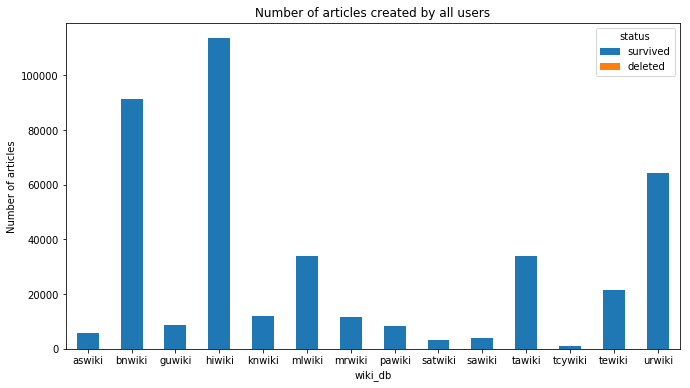

In [328]:
new_articles_all = art_creation_counts \
                  .groupby(['status', 'wiki_db'], as_index = False)['num_articles_created'] \
                  .sum() \
                  .pivot(index='wiki_db', columns='status', values='num_articles_created')
fig = new_articles_all.loc[:,['survived','deleted']].plot.bar(stacked=True, figsize=(11, 6))
fig.tick_params(axis = 'x', labelrotation=0)
fig.set_ylabel('Number of articles')
fig.set_title('Number of articles created by all users')
fig.get_figure().savefig('./figs/articles_all_users.png', dpi=300)

/home/iflorez/venv/lib/python3.5/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


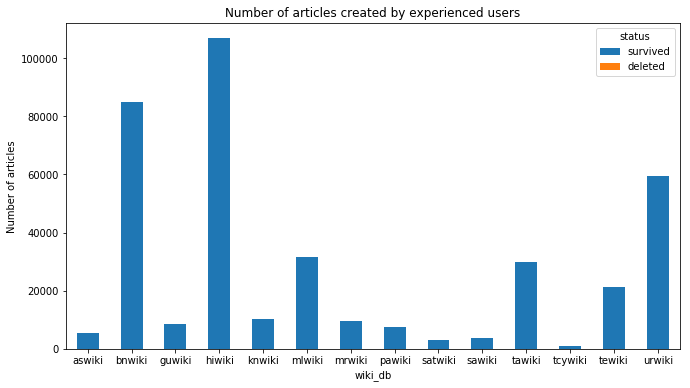

In [401]:
new_articles_experienced = art_creation_counts[(art_creation_counts.user_experience == 'experienced')] \
                  .groupby(['status', 'wiki_db'], as_index = False)['num_articles_created'] \
                  .sum() \
                  .pivot(index='wiki_db', columns='status', values='num_articles_created')
fig = new_articles_experienced.loc[:,['survived','deleted']].plot.bar(stacked=True, figsize=(11, 6))
fig.tick_params(axis = 'x', labelrotation=0)
fig.set_ylabel('Number of articles')
fig.set_title('Number of articles created by experienced users')
fig.get_figure().savefig('./figs/articles_experienced_users.png', dpi=300)

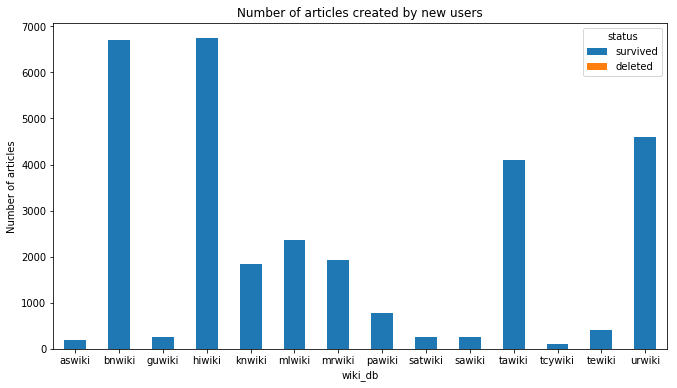

In [402]:
new_articles_new = art_creation_counts[(art_creation_counts.user_experience == 'new')] \
               .groupby(['status', 'wiki_db'], as_index = False)['num_articles_created'] \
               .sum() \
               .pivot(index='wiki_db', columns='status', values='num_articles_created')
fig = new_articles_new.loc[:,['survived','deleted']].plot.bar(stacked=True, figsize=(11, 6))
fig.tick_params(axis = 'x', labelrotation=0)
fig.set_ylabel('Number of articles')
fig.set_title('Number of articles created by new users')
fig.get_figure().savefig('./figs/articles_new_users.png', dpi=300)